In [1]:
#A car company prepared different versions of same ad, potraying its car in different scenario.
#So the problem is that they prepaired 10 gr8 version of the same ad and they are not sure to put which version of the ad on social network
#they want to put that ad which gets maximum clicks
#so whenever we a user logs in we will show him some version of ad and based on if he clicks or not that version gets reward
#so we will follow RF learning to show ads in next round(the strategy will depend on each round depending upon the results in previous rounds)
#we will show ads to 10,000 users
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0     0     1      0
14       0

In [ ]:
#above we have 10 versions of the same ad and we have the CTR(if clicked then 1 if not clicked then 0 ) 
#note that upar to dikh rha hai apan ko ki user[0] will click on Ad1,Ad5 and Ad9 if shown to him but our algo doesn't knows 
#our algo's strategy of showing ads to the user will depend at each round on the previous result it observed at previous round(online learning)

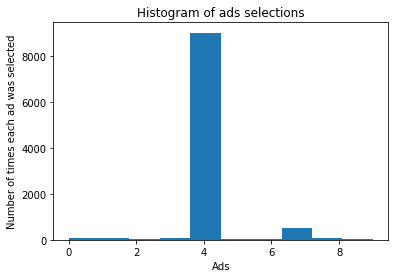

In [4]:
#Implementing Thompson Sampling from scratch
import random
N=10000
d=10 #no. of ads
ads_selected=[] #a vector that shows ads that were selected after each round
number_of_1s_reward_upto_round_n=[0]*d #vector of 10 elements intialized as zeroes
number_of_0s_reward_upto_round_n=[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_random_draw=0
    for i in range(0, d):
        random_beta=random.betavariate(number_of_1s_reward_upto_round_n[i]+1,number_of_0s_reward_upto_round_n[i]+1)
        if(random_beta> max_random_draw):
            max_random_draw= random_beta 
            ad = i # to keep track of the ad which was selected 
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if(reward==1):
        number_of_1s_reward_upto_round_n[ad]=number_of_1s_reward_upto_round_n[ad]+1
    else:
        number_of_0s_reward_upto_round_n[ad]=number_of_0s_reward_upto_round_n[ad]+1

    total_reward=total_reward+reward
    
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
    

In [8]:
print(total_reward)

2596
